In [ ]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as soup
import requests


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->



<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">

    <title>COVID - Coronavirus Statistics - Worldometer</title>
    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">


    
	<!-- Favicon -->
	<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">
	<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">
	<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">
	<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">
	<link rel="apple-touch-icon" sizes="
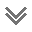

In [ ]:
# Scrape the data
x = requests.get('https://www.worldometers.info/coronavirus/#countries')
print(x.text)

In [ ]:
page_soup = soup(x.text, "html.parser")

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
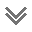

In [ ]:
print(page_soup.prettify())

In [ ]:
table = page_soup.find("table", id='main_table_countries_today')

In [ ]:
print(table)

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br>Cases</br></th>
<th width="30">Serious,<br>Critical</br></th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="

In [ ]:
data = []
headers = []
for idx, row in enumerate(table.find_all('tr')):
    row_data = []
    for cell in row.find_all(['th', 'td']):
        if idx == 0:
            header_text = cell.text.strip()
            if header_text not in ['Total', 'Serious', 'Tot Cases/1M pop']:
                headers.append(header_text)
        else:
            row_data.append(cell.text.strip())
    if row_data:
        data.append(row_data)

In [ ]:
df = pd.DataFrame(data, columns=headers)

In [ ]:
print(df.columns)

Index(['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/\n1M pop', 'Population', 'Continent', '1 Caseevery X ppl',
       '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop',
       'New Deaths/1M pop', 'Active Cases/1M pop'],
      dtype='object')


In [ ]:
df['ActiveCases'] = df['ActiveCases'].replace('N/A', float('nan'))

In [ ]:
df['ActiveCases'] = df['ActiveCases'].astype(float)

In [ ]:
df['Population'] = df['Population'].replace('N/A', float('nan'))

In [ ]:
df['Population'] = df['Population'].replace(['N/A', ''], '0').str.replace(',', '').astype(float)

In [ ]:
average_active_cases = df['ActiveCases'].mean()
print("Average number of active cases:", average_active_cases)

Average number of active cases: 410087.58407079644


In [ ]:
df['Infection Rate'] = df['ActiveCases'] / df['Population'] * 100
global_infection_rate = df['ActiveCases'].sum() / df['Population'].sum() * 100
print("Global infection rate: {:.4f}%".format(global_infection_rate))

Global infection rate: 1.1665%


In [ ]:
print(df.head())

  #  Country,Other TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
0    North America  128997336              1652633                124719053   
1             Asia  220810861      +82     1551534        +2      204530282   
2           Europe  250790529    +1039     2078038        +2      246633821   
3    South America   69178247              1362310                 66556462   
4          Oceania   14698883                30699                 14561851   

  NewRecovered  ActiveCases Serious,Critical  ... Tests/\n1M pop Population  \
0        +1334    2625650.0             6549  ...                       0.0   
1          +17   14729045.0            15143  ...                       0.0   
2        +3506    2078670.0             5649  ...                       0.0   
3                 1259475.0            10098  ...                       0.0   
4                  106333.0               49  ...                       0.0   

           Continent 1 Caseevery X ppl  1 Deatheve